# Search in vizier catalogs and NED

In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
import astropy.coordinates as coordinates
from astropy.coordinates import Angle
import astropy.units as u

In [2]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [3]:
result_table = Simbad.query_object(target_name_simbad)

In [4]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
BAX 013.5117-28.3994,00 54 02.8,-28 23 58,5,5,--,--,0,D,,1998ApJ...502..558V,1


In [5]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [6]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [7]:
coord.ra.deg

13.511666666666665

In [8]:
coord.dec.deg

-28.399444444444445

In [9]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [39]:
Simbad.add_votable_fields('z_value','rv_value','flux(U)','flux(B)', 'flux(V)', 'flux(R)', 'flux(I)',
                          'flux(J)','flux(H)','flux(K)','otype')

In [37]:
Simbad.get_field_description ('z_value') 

Redshift value. Eventually translated from a radial velocity


In [38]:
Simbad.get_field_description ('rv_value') 

Radial velocity value. Eventually translated from a redshift


In [46]:
Simbad.get_field_description ('flux(filtername)') 

value of the flux for the given filter


In [40]:
result_table = Simbad.query_region(target_name_simbad, radius=0.25 * u.deg)

In [41]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Z_VALUE,FLUX_U,FLUX_B,FLUX_V,FLUX_R,FLUX_I,FLUX_J,FLUX_H,FLUX_K,OTYPE,SP_TYPE,SP_QUAL,SP_BIBCODE,Z_VALUE_2,RV_VALUE,FLUX_U_1,FLUX_B_1,FLUX_V_1,FLUX_R_1,FLUX_I_1,FLUX_J_1,FLUX_H_1,FLUX_K_1,OTYPE_2,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,km / s,mag,mag,mag,mag,mag,mag,mag,mag,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float32,float32,float32,float32,float32,float32,float32,float32,object,object,str1,object,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,object,int32
BAX 013.5117-28.3994,00 54 02.8,-28 23 58,5,5,--,--,0,D,,1998ApJ...502..558V,0.2920000,--,--,--,--,--,--,--,--,ClG,,,,0.2920000,75167.000,--,--,--,--,--,--,--,--,ClG,1
[GGM2011] 210,00 54 03.18,-28 24 00.7,6,6,--,--,0,D,O,2011RAA....11..245G,0.2933700,--,--,--,--,--,--,--,--,Galaxy,,,,0.2933700,75464.000,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 512,00 54 03.14,-28 23 52.7,6,6,--,--,0,D,O,2011RAA....11..245G,0.2928000,--,--,--,--,--,--,--,--,Galaxy,,,,0.2928000,75333.000,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 511,00 54 03.29,-28 24 10.8,6,6,--,--,0,D,O,2011RAA....11..245G,--,--,--,--,--,--,--,--,--,Galaxy,,,,--,--,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 209,00 54 02.21,-28 23 45.4,6,6,--,--,0,D,O,2011RAA....11..245G,0.2857900,--,--,--,--,--,--,--,--,Galaxy,,,,0.2857900,73811.000,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 510,00 54 03.35,-28 24 12.8,6,6,--,--,0,D,O,2011RAA....11..245G,0.2934000,--,--,--,--,--,--,--,--,Galaxy,,,,0.2934000,75471.000,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 494,00 54 02.67,-28 24 15.0,6,6,--,--,0,D,O,2011RAA....11..245G,0.2946000,--,--,--,--,--,--,--,--,Galaxy,,,,0.2946000,75724.000,--,--,--,--,--,--,--,--,Galaxy,1
[GGM2011] 509,00 54 03.39,-28 24 14.4,6,6,--,--,0,D,O,2011RAA....11..245G,0.2918000,--,--,--,--,--,--,--,--,Galaxy,,,,0.2918000,75117.000,--,--,--,--,--,--,--,--,Galaxy,1


## Search catalogs

In [13]:
catalog_list = Vizier.find_catalogs('Giraud')
print({k:v.description for k,v in catalog_list.items()})

{'VIII/88': 'Planck Early Release Compact Source Catalogue (Planck, 2011)', 'J/A+A/402/113': '(RI)c photometry of variables in M31 (Joshi+, 2003)', 'J/A+A/421/509': 'AGAPE catalogue of M31 variables (Ansari+, 2004)', 'J/A+A/436/457': 'Ultra-steep spectrum radio sources (Gopal-Krishna+, 2005)', 'J/A+A/581/A14': 'Updated Planck catalogue PSZ1 (Planck+, 2015)', 'J/A+A/594/A26': 'Second Planck Catalogue of Compact Sources (PCCS2) (Planck+, 2016)', 'J/A+A/594/A27': 'Planck Sunyaev-Zeldovich sources (PSZ2) (Planck+, 2016)', 'J/A+A/594/A28': 'Planck Catalogue of Galactic cold clumps (PGCC) (Planck+, 2016)', 'J/A+A/596/A100': 'Planck high-z source candidates catalog (PHZ) (Planck+, 2016)', 'J/A+A/596/A106': '1Jy northern AGN sample (Planck+, 2016)', 'J/MNRAS/351/1071': 'POINT-AGAPE Survey. M31 variables (An+, 2004)', 'J/other/RAA/11.245': 'Galaxies in the field of RX J0054.0-2823 (Giraud+, 2011)'}


In [14]:
result = Vizier(catalog='J/other/RAA/11.245',columns=['*']).query_region(target_name_simbad,radius="15m")
print(result)

TableList with 1 tables:
	'0:J/other/RAA/11.245/table5' with 12 column(s) and 50 row(s) 


## Search target name

In [15]:
result = Vizier.query_object(target_name_simbad)
print(result)

TableList with 95 tables:
	'0:I/252/out' with 8 column(s) and 24 row(s) 
	'1:I/271/out' with 11 column(s) and 5 row(s) 
	'2:I/284/out' with 14 column(s) and 32 row(s) 
	'3:I/297/out' with 19 column(s) and 32 row(s) 
	'4:I/305/out' with 11 column(s) and 41 row(s) 
	'5:I/317/sample' with 13 column(s) and 31 row(s) 
	'6:I/319/xpm' with 25 column(s) and 6 row(s) 
	'7:I/320/spm4' with 21 column(s) and 2 row(s) 
	'8:I/324/igsl3' with 18 column(s) and 27 row(s) 
	'9:I/327/cmc15' with 9 column(s) and 1 row(s) 
	'10:I/331/apop' with 20 column(s) and 9 row(s) 
	'11:I/337/gaia' with 14 column(s) and 8 row(s) 
	'12:I/339/hsoy' with 18 column(s) and 5 row(s) 
	'13:I/345/gaia2' with 32 column(s) and 10 row(s) 
	'14:I/347/gaia2dis' with 9 column(s) and 9 row(s) 
	'15:I/349/starhorse' with 19 column(s) and 1 row(s) 
	'16:I/350/gaiaedr3' with 39 column(s) and 13 row(s) 
	'17:I/350/comscanl' with 13 column(s) and 2 row(s) 
	'18:I/351/gps1_p' with 22 column(s) and 27 row(s) 
	'19:I/352/gedr3dis' with 10 

In [16]:
result = Vizier.query_region(target_name_simbad, radius=Angle(0.25, "deg"), catalog='*2d*')

In [17]:
result

TableList with 4 tables:
	'0:I/347/gaia2dis' with 9 column(s) and 50 row(s) 
	'1:J/MNRAS/348/866/2dfsgpgr' with 8 column(s) and 8 row(s) 
	'2:J/MNRAS/348/866/2dfsgpga' with 10 column(s) and 39 row(s) 
	'3:VII/250/2dfgrs' with 11 column(s) and 39 row(s) 

In [18]:
r_deg = 13/60.

In [19]:
result = Vizier.query_region(target_name_simbad, radius=Angle(r_deg, "deg"), catalog='*galex*')

In [20]:
result

TableList with 1 tables:
	'0:II/335/galex_ais' with 15 column(s) and 50 row(s) 

In [21]:
#catalog_list = Vizier.find_catalogs('galex')
#print({k:v.description for k,v in catalog_list.items()})

In [22]:
result = Vizier.query_region(target_name_simbad, radius=Angle(r_deg, "deg"), catalog='*des*')

In [23]:
result

TableList with 3 tables:
	'0:II/369/vexasdes' with 26 column(s) and 50 row(s) 
	'1:II/371/des_dr2' with 24 column(s) and 50 row(s) 
	'2:II/357/des_dr1' with 22 column(s) and 50 row(s) 

# NED

In [24]:
from astroquery.ipac.ned import Ned
images = Ned.get_images(target_name_ned)  

In [25]:
images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11e2372e0>]]

In [26]:
hdu = images[0]

In [27]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     106   (177, 177)   int16   


In [28]:
header = hdu[0].header
header

SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                  177 /Length X axis                                   
NAXIS2  =                  177 /Length Y axis                                   
DATE    = '21/05/23          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'J 4606            ' /Observatory plate label                         
PLATEID = '025A              ' /GSSS Plate ID                                   
REGION  = 'S411              ' /GSSS Region Name                                
DATE-OBS= '25/10/78          ' /UT date of Observation                          
UT      = '11:25:00.00       ' /UT time of observation                          
EPOCH   =  1.9788149414063E+

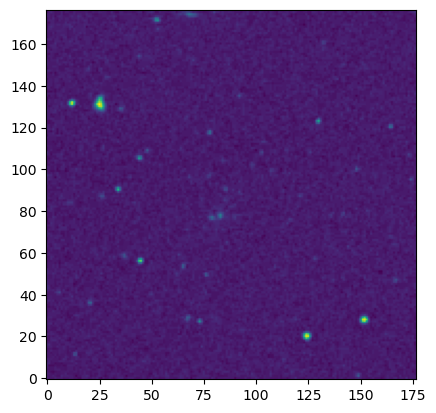

In [29]:
plt.imshow(hdu[0].data,origin="lower")

## Nice plot in equatorial coordinates
https://docs.astropy.org/en/stable/visualization/wcsaxes/overlays.html

In [30]:
wcs = WCS(header)

Changed DATE-OBS from '25/10/78          ' to '1978-10-25''. [astropy.wcs.wcs]


Text(0.5, 1.0, 'RX J0054.0-2823')

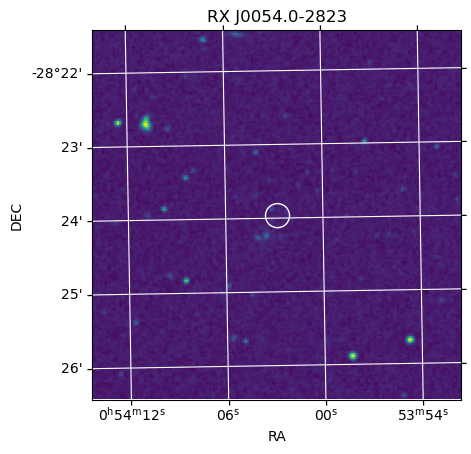

In [31]:
fig=plt.figure()
ax = fig.add_subplot(projection=wcs)
ax.imshow(hdu[0].data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.scatter(coord.ra.deg, coord.dec.deg, s=300, edgecolor='white', facecolor='none',transform=ax.get_transform('icrs'))
ax.set_title(target_name_ned)

In [32]:
from astroquery.ipac.ned import Ned

spectra = Ned.get_spectra(target_name_ned)  

In [33]:
spectra

[]

In [34]:
result_table = Ned.get_table(target_name_ned, table='positions')
print(result_table)

No.       RA            DEC       Frequency ... Published Unit Published Frame Published Frequence Mode    Qualifiers   
                                            ...                                                                         
--- -------------- -------------- --------- ... -------------- --------------- ------------------------ ----------------
  0    00h54m02.8s     -28d23m58s           ...                                                                         
  1 00h54m02.8000s -28d23m58.000s           ...    Sexagesimal             FK5                          Uncertain origin
  2    00h54m02.8s     -28d23m58s           ... Decimal degree                                          Uncertain origin
  3    00h54m03.3s     -28d24m11s           ...    Sexagesimal                                          Uncertain origin


In [35]:
result_table = Ned.get_table(target_name_ned, table='photometry')
print(result_table)

No. Observed Passband ...                                                 Comments                                                
                      ...                                                                                                         
--- ----------------- ... --------------------------------------------------------------------------------------------------------
  1 0.5-2 keV (ROSAT) ... From new raw data; Extinction-corrected for Milky Way; NEDfrequency assigned to mid-point of band in keV


In [36]:
result_table = Ned.get_table(target_name_ned, table='photometry')
print(result_table)

No. Observed Passband ...                                                 Comments                                                
                      ...                                                                                                         
--- ----------------- ... --------------------------------------------------------------------------------------------------------
  1 0.5-2 keV (ROSAT) ... From new raw data; Extinction-corrected for Milky Way; NEDfrequency assigned to mid-point of band in keV
